In [1]:
from deepSculpt.curator.tools.params import COLORS
from deepSculpt.sculptor.sculptor import Sculptor
from deepSculpt.manager.tools.plotter import Plotter
from deepSculpt.curator.tools.new_preproccesing import OneHotEncoderDecoder

import os

2023-02-16 11:50:58.789170: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 11:51:02.316196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
volumes_void, materials_void = Sculptor(
    void_dim=32,
    edges=(30, 0.9, 0.95),  # number of elements, minimun, maximun
    planes=(5, 0.4, 0.5),
    volumes=(3, 0.3, 0.9),
    grid=(1, 4),  # minimun height of column, and maximun height
    materials_edges=COLORS['edges'],
    materials_planes=COLORS['planes'],
    materials_volumes=COLORS['volumes'],
    step=6).generative_sculpt()

In [5]:
from deepSculpt.curator.curator import Curator

curator = Curator(
    void_dim=48,
    edge_elements=(3, 0.2, 0.6),
    plane_elements=(3, 0.2, 0.6),
    volume_elements=(3, 0.2, 0.6),
    step=None,
    grid=1,
    directory='.',
    n_samples=10,
)

# Creates the data
volumes_void, materials_void = curator.create_sculpts()


 🔽 Just created 'volume_data' shaped (10, 48, 48, 48) and 'material_data' shaped(10, 48, 48, 48)


In [6]:
preprocessing_class_o = OneHotEncoderDecoder(materials_void, materials=materials, verbose=1)

o_encode, o_classes = preprocessing_class_o.ohe_encode()

A number of 10 samples shaped (10, 48, 48, 48) have been encoded in 6 classes: ['dimgrey' 'snow' 'crimson' 'turquoise' 'gold' None]


In [7]:
decode_volumes_void, decode_materials_void = preprocessing_class_o.ohe_decode(o_encode)


A number of 10 samples shaped (10, 48, 48, 48, 6) have been decoded in 6 classes: ['dimgrey' 'snow' 'crimson' 'turquoise' 'gold' None]



 🔽 Plotting [16-02-2023-11-51-49]

 🔽 Just created a snapshot image[16-02-2023-11-51-49].png @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/picture

 🔽 Just created a vectorial snapshot vectorial[16-02-2023-11-51-49].svg @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/vectorial

 🔽 Just created a volume array volume_array[16-02-2023-11-51-49] @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/volume_array

 🔽 Just created a material array material_array[16-02-2023-11-51-49] @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/material_array


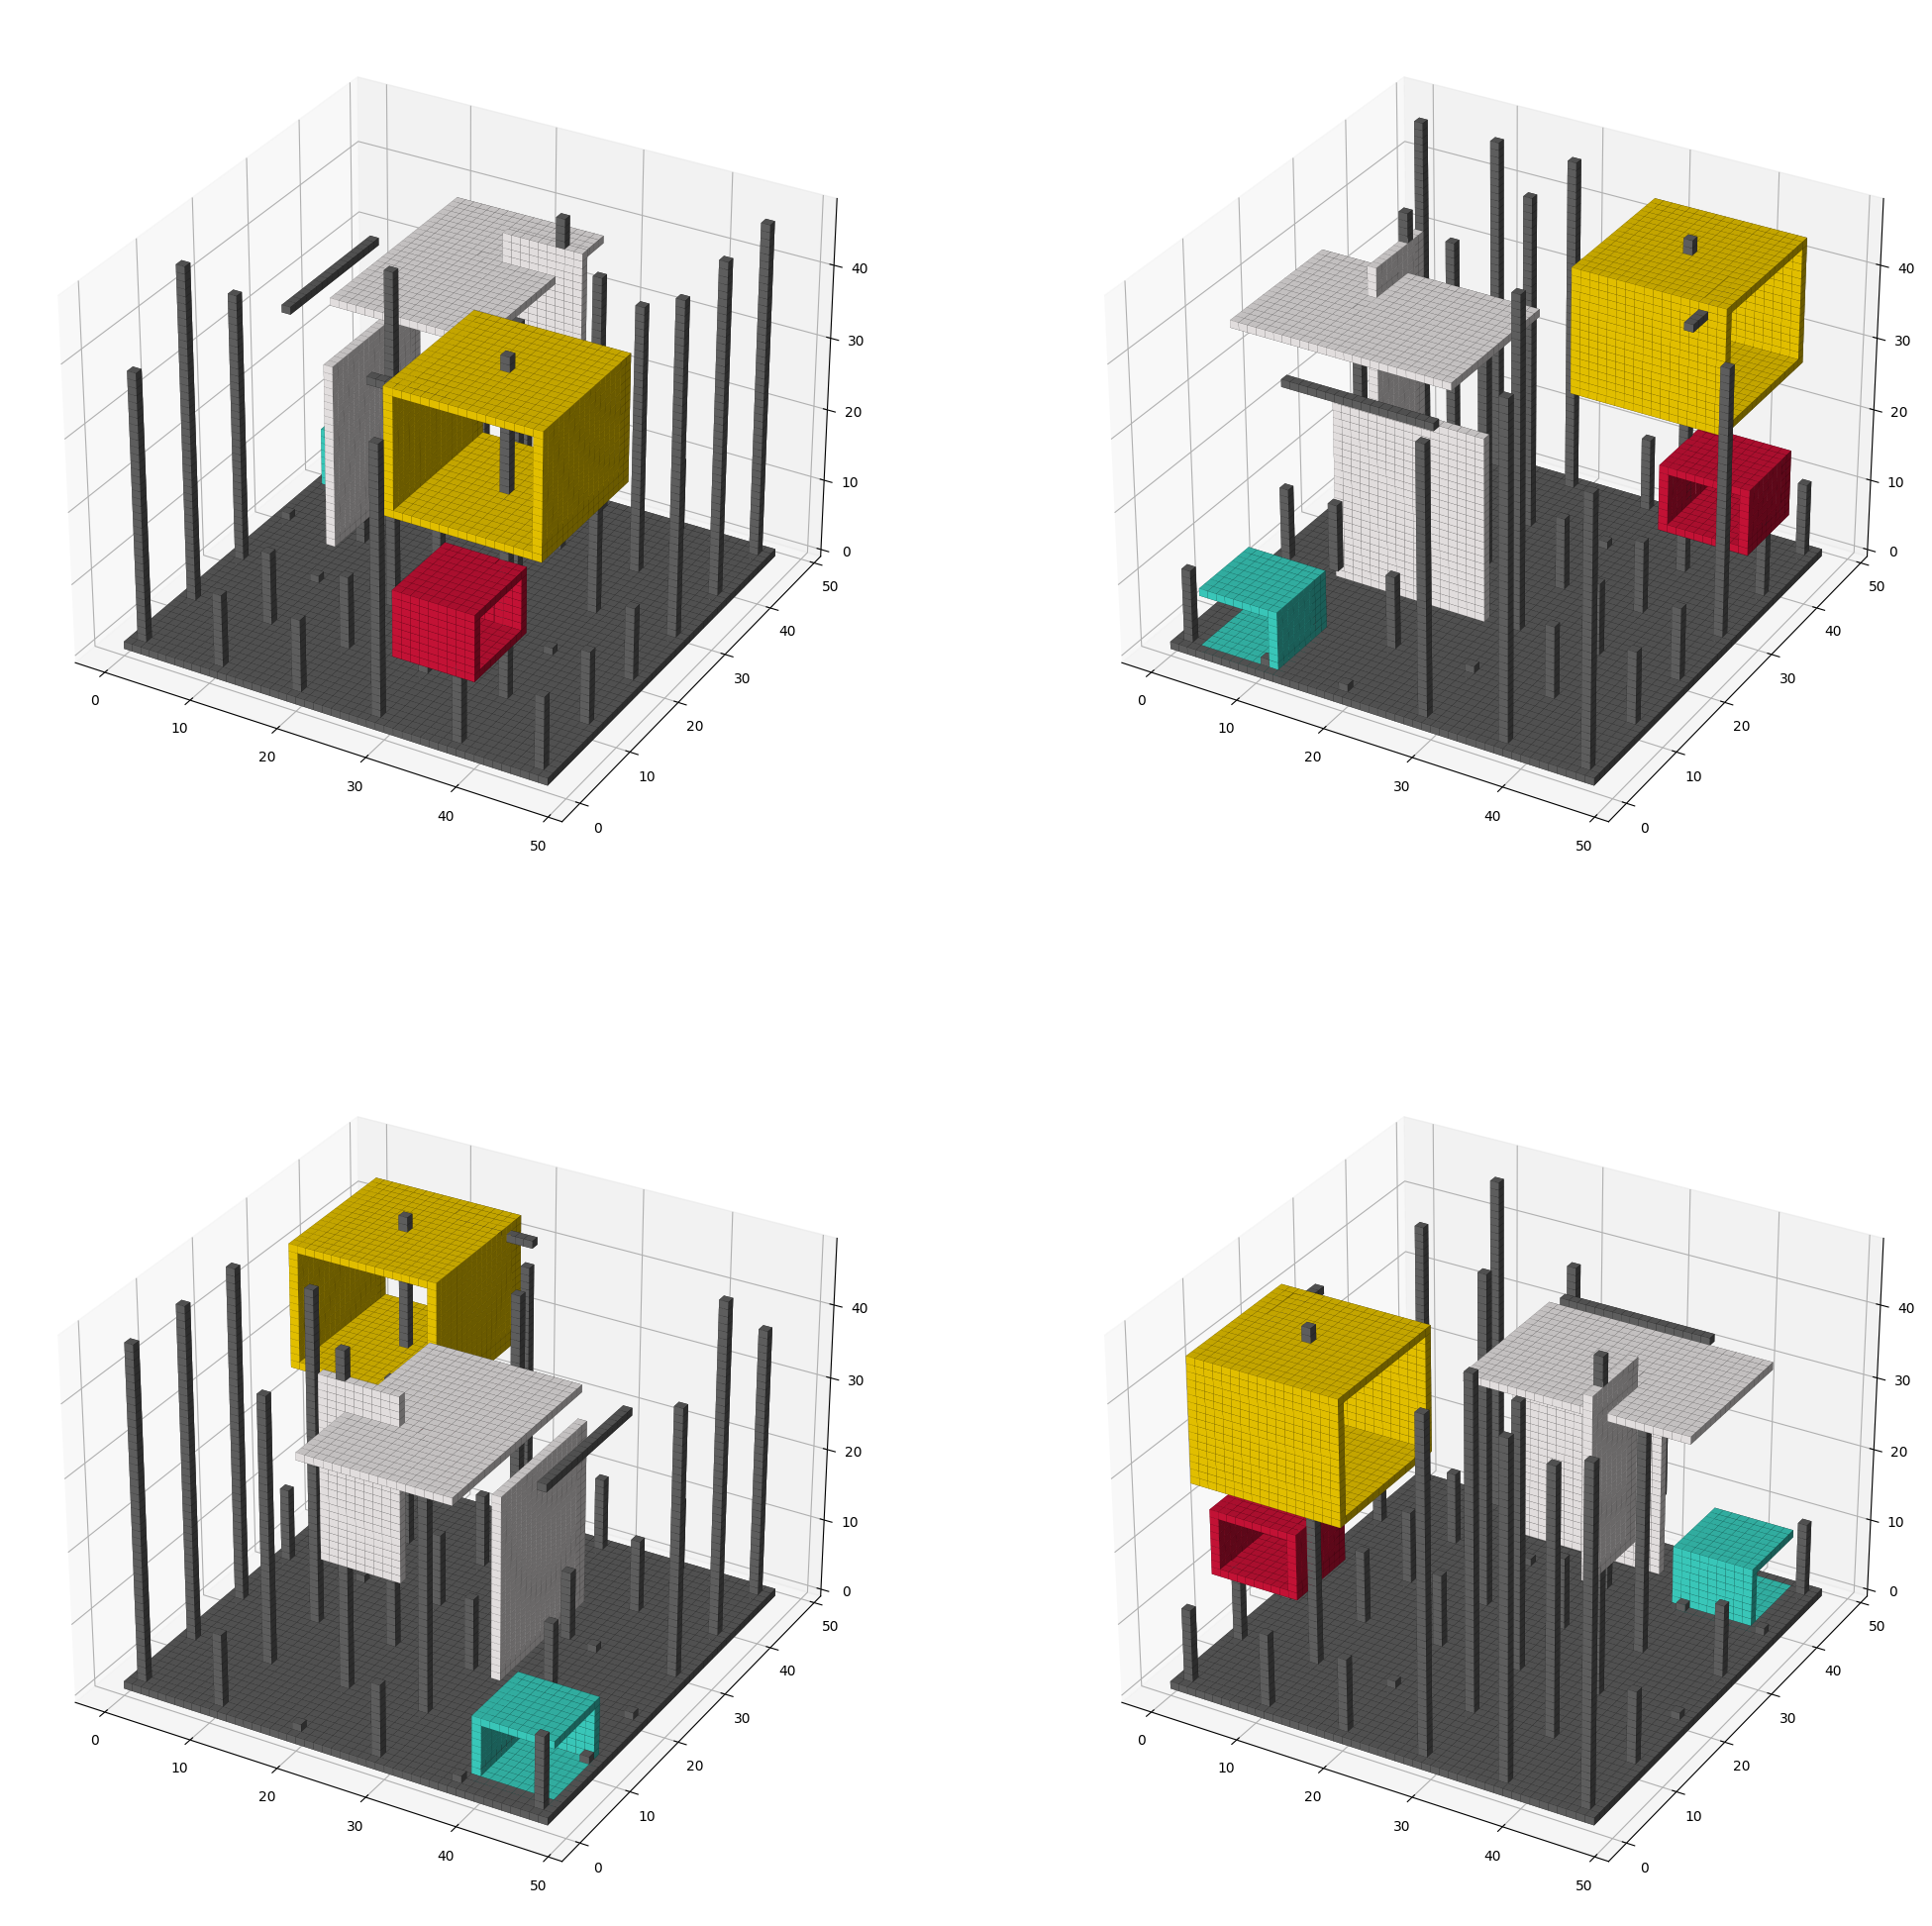

In [8]:
plot = Plotter(volumes=decode_volumes_void[0, :, :, :],
               colors=decode_materials_void[0, :, :, :])

out_dir = os.path.join(os.environ.get("HOME"), "code", "juan-garassino",
                       "deepSculpt", 'results')

plot.plot_sculpture(out_dir)


 🔽 Plotting [16-02-2023-11-55-11]

 🔽 Just created a snapshot image[16-02-2023-11-55-11].png @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/picture

 🔽 Just created a vectorial snapshot vectorial[16-02-2023-11-55-11].svg @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/vectorial

 🔽 Just created a volume array volume_array[16-02-2023-11-55-11] @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/volume_array

 🔽 Just created a material array material_array[16-02-2023-11-55-11] @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/material_array


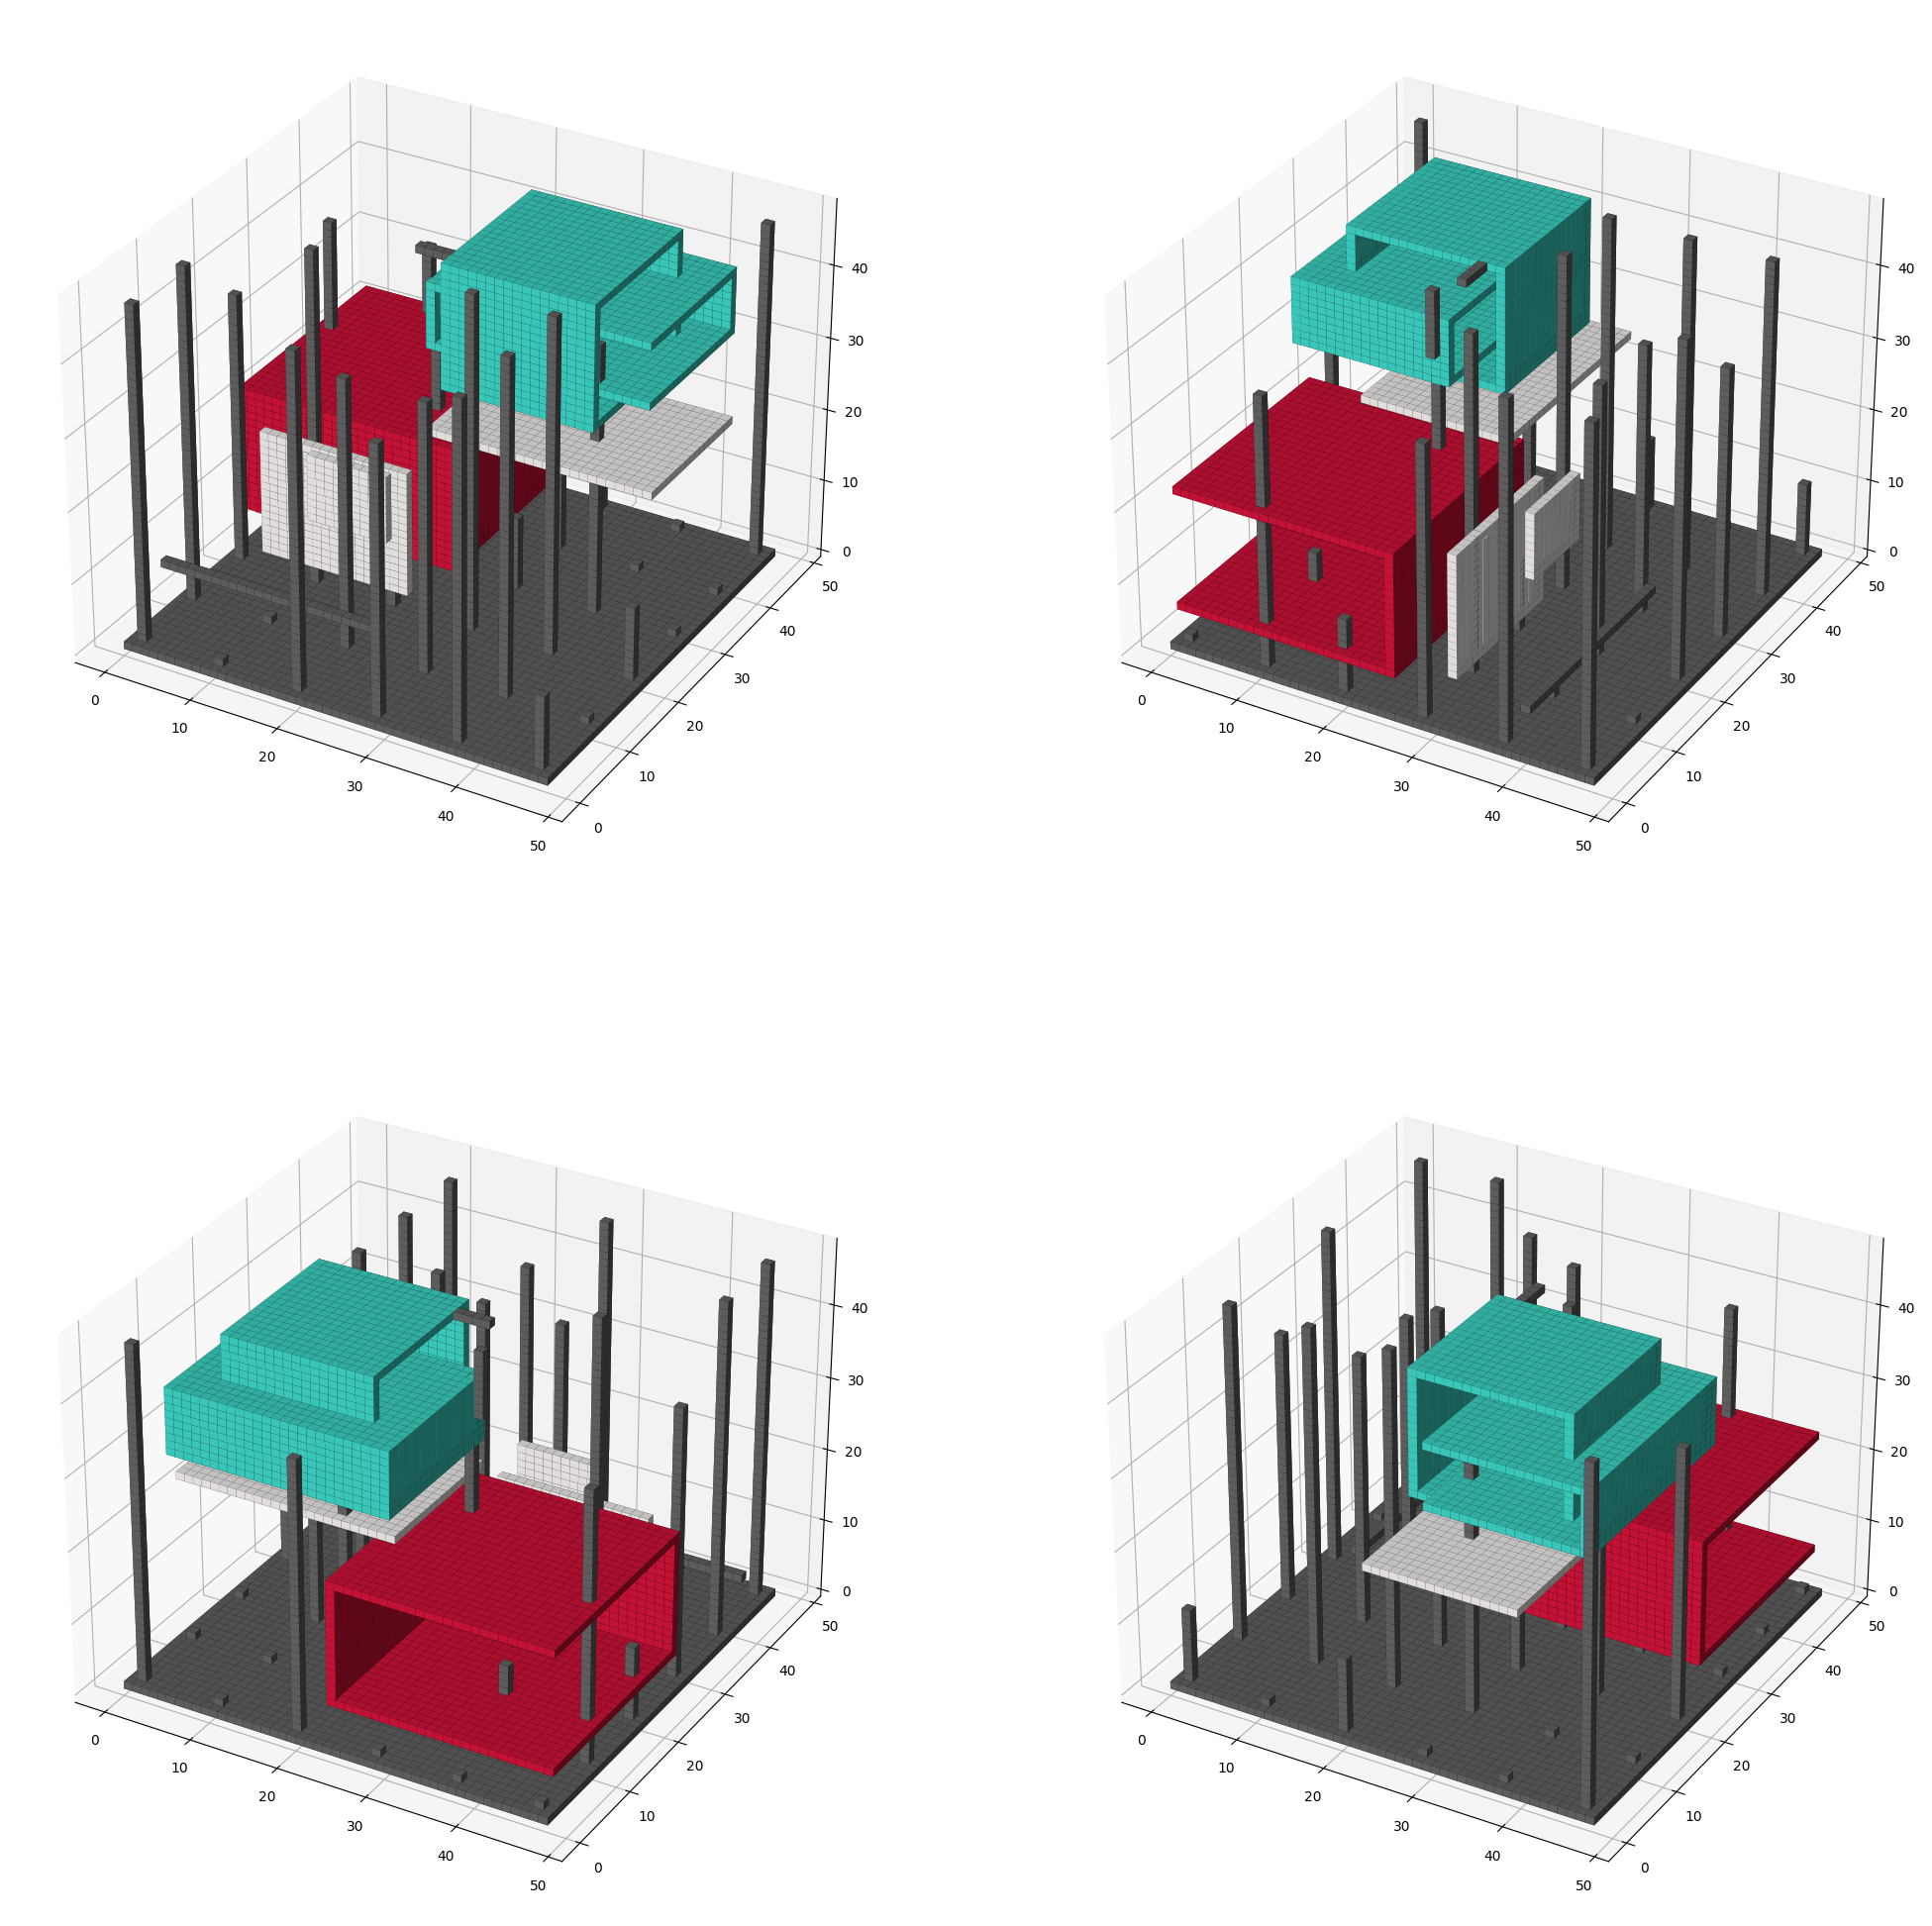

In [9]:
plot = Plotter(volumes=decode_volumes_void[3, :, :, :],
               colors=decode_materials_void[3, :, :, :])

out_dir = os.path.join(os.environ.get("HOME"), "code", "juan-garassino",
                       "deepSculpt", 'results')

plot.plot_sculpture(out_dir)